### Needed libraries

In [1]:
#data structure
import numpy as np
import pandas as pd

#statistical library
import statsmodels.api as sm
import warnings
warnings.filterwarnings('ignore')
#plots
import matplotlib.pyplot as plt
import seaborn as sns

#Models
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn.svm import SVC

#Model tranning and testing
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.multiclass import OneVsRestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import label_binarize
from sklearn import metrics
from sklearn.model_selection import KFold
from sklearn.feature_selection import VarianceThreshold

#Model accuracy meaurements
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import r2_score, explained_variance_score, mean_absolute_error, mean_squared_error
from math import sqrt
from sklearn.metrics import roc_curve, roc_auc_score, auc
from sklearn.model_selection import learning_curve

In [2]:
data=pd.read_csv(r"D:\A.Studies\assignment\Machine learning\OBL 2 project\Marketing stratergy old.csv")
data
data=data.sample(frac=0.1,random_state=10)
data

food_category  store_sales(in millions)  store_cost(in millions)  \
8073  Breakfast Foods                      7.08                   2.7612   
66              Bread                      2.52                   1.0080   
4685   Paper Products                      3.18                   1.0176   
8106        Specialty                      3.96                   1.6632   
7747   Canned Oysters                      6.36                   1.9716   
...               ...                       ...                      ...   
7414      Snack Foods                      5.90                   2.8320   
1173      Snack Foods                      5.04                   1.6632   
2484      Snack Foods                      8.25                   3.4650   
5908       Vegetables                     11.04                   5.1888   
1243      Snack Foods                      7.88                   2.6792   

      unit_sales(in millions)         promotion_name sales_country  \
8073                        3              Big Promo           USA   
66                          2             Sales Days           USA   
4685                        2           Super Savers        Mexico   
8106                        4             Sales Days        Mexico   
7747                        3  Cash Register Lottery           USA   
...                       ...                    ...           ...   
7414                        2              Big Promo           USA   
1173                        3  Cash Register Lottery           USA   
2484                        5           Best Savings           USA   
5908                        3      Pick Your Savings        Mexico   
1243                        4              Big Promo           USA   

     marital_status gender            education member_card  ...  \
8073              M      M   High School Degree      Silver  ...   
66                M      M  Partial High School      Bronze  ...   
4685              S      M      Partial College      Bronze  ...   
8106              M      F  Partial High School      Normal  ...   
7747              S      F  Partial High School      Bronze  ...   
...             ...    ...                  ...         ...  ...   
7414              S      M  Partial High School      Bronze  ...   
1173              S      F   High School Degree      Bronze  ...   
2484              M      M   High School Degree      Bronze  ...   
5908              S      F     Bachelors Degree      Normal  ...   
1243              S      F   High School Degree      Bronze  ...   

     avg yearly_income           store_type     store_city store_state  \
8073       $30K - $50K  Gourmet Supermarket  Beverly Hills          CA   
66         $10K - $30K          Supermarket        Spokane          WA   
4685       $50K - $70K          Supermarket        Orizaba    Veracruz   
8106       $10K - $30K   Deluxe Supermarket         Merida     Yucatan   
7747       $70K - $90K   Deluxe Supermarket          Salem          OR   
...                ...                  ...            ...         ...   
7414       $30K - $50K   Deluxe Supermarket         Tacoma          WA   
1173       $30K - $50K   Deluxe Supermarket          Salem          OR   
2484       $50K - $70K          Supermarket        Seattle          WA   
5908       $10K - $30K   Deluxe Supermarket        Hidalgo   Zacatecas   
1243       $30K - $50K          Supermarket        Spokane          WA   

     store_sqft  grocery_sqft  frozen_sqft  meat_sqft  \
8073      23688         15337         5011       3340   
66        30268         22063         4923       3282   
4685      34791         26354         5062       3375   
8106      30797         20141         6393       4262   
7747      27694         18670         5415       3610   
...         ...           ...          ...        ...   
7414      33858         22123         7041       4694   
1173      27694         18670         5415       3610   
2484      21215         13305      

### dataset structure

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 812 entries, 8073 to 1243
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   food_category             812 non-null    object 
 1   store_sales(in millions)  812 non-null    float64
 2   store_cost(in millions)   812 non-null    float64
 3   unit_sales(in millions)   812 non-null    int64  
 4   promotion_name            812 non-null    object 
 5   sales_country             812 non-null    object 
 6   marital_status            812 non-null    object 
 7   gender                    812 non-null    object 
 8   education                 812 non-null    object 
 9   member_card               812 non-null    object 
 10  occupation                812 non-null    object 
 11  avg yearly_income         812 non-null    object 
 12  store_type                812 non-null    object 
 13  store_city                812 non-null    object 
 14  store_state

In [4]:
data.describe()

store_sales(in millions)  store_cost(in millions)  \
count                812.000000               812.000000   
mean                   6.428510                 2.574453   
std                    3.325743                 1.382050   
min                    1.020000                 0.326400   
25%                    3.922500                 1.530300   
50%                    5.845000                 2.326500   
75%                    8.197500                 3.343350   
max                   18.500000                 8.400000   

       unit_sales(in millions)    store_sqft  grocery_sqft  frozen_sqft  \
count               812.000000    812.000000    812.000000   812.000000   
mean                  3.099754  28757.369458  19703.774631  5432.206897   
std                   0.790604   4752.620421   3838.524023  1142.596943   
min                   1.000000  20319.000000  13305.000000  2452.000000   
25%                   3.000000  23688.000000  16418.000000  4923.000000   
50%                   3.000000  30268.000000  20141.000000  5188.000000   
75%                   4.000000  30797.000000  22123.000000  5633.000000   
max                   5.000000  39696.000000  27463.000000  9184.000000   

         meat_sqft        cost  
count   812.000000  812.000000  
mean   3621.463054   95.325690  
std     761.661739   34.291056  
min    1635.000000   51.120000  
25%    3282.000000   59.860000  
50%    3458.000000   95.780000  
75%    3755.000000  123.610000  
max    6122.000000  147.170000

In [5]:
data.isnull().sum()

food_category               0
store_sales(in millions)    0
store_cost(in millions)     0
unit_sales(in millions)     0
promotion_name              0
sales_country               0
marital_status              0
gender                      0
education                   0
member_card                 0
occupation                  0
avg yearly_income           0
store_type                  0
store_city                  0
store_state                 0
store_sqft                  0
grocery_sqft                0
frozen_sqft                 0
meat_sqft                   0
media_type                  0
cost                        0
dtype: int64

In [6]:
for column in data:
    unique_vals = np.unique(data[column])
    nr_values = len(unique_vals)
    if nr_values < 10:
        print('The number of values for feature {} :{} -- {}'.format(column, nr_values,unique_vals))
    else:
        print('The number of values for feature {} :{}'.format(column, nr_values))

The number of values for feature food_category :44
The number of values for feature store_sales(in millions) :428
The number of values for feature store_cost(in millions) :747
The number of values for feature unit_sales(in millions) :5 -- [1 2 3 4 5]
The number of values for feature promotion_name :7 -- ['Best Savings' 'Big Promo' 'Cash Register Lottery' 'Pick Your Savings'
 'Sales Days' 'Super Savers' 'Wallet Savers']
The number of values for feature sales_country :3 -- ['Canada' 'Mexico' 'USA']
The number of values for feature marital_status :2 -- ['M' 'S']
The number of values for feature gender :2 -- ['F' 'M']
The number of values for feature education :5 -- ['Bachelors Degree' 'Graduate Degree' 'High School Degree'
 'Partial College' 'Partial High School']
The number of values for feature member_card :4 -- ['Bronze' 'Golden' 'Normal' 'Silver']
The number of values for feature occupation :5 -- ['Clerical' 'Management' 'Manual' 'Professional' 'Skilled Manual']
The number of values f

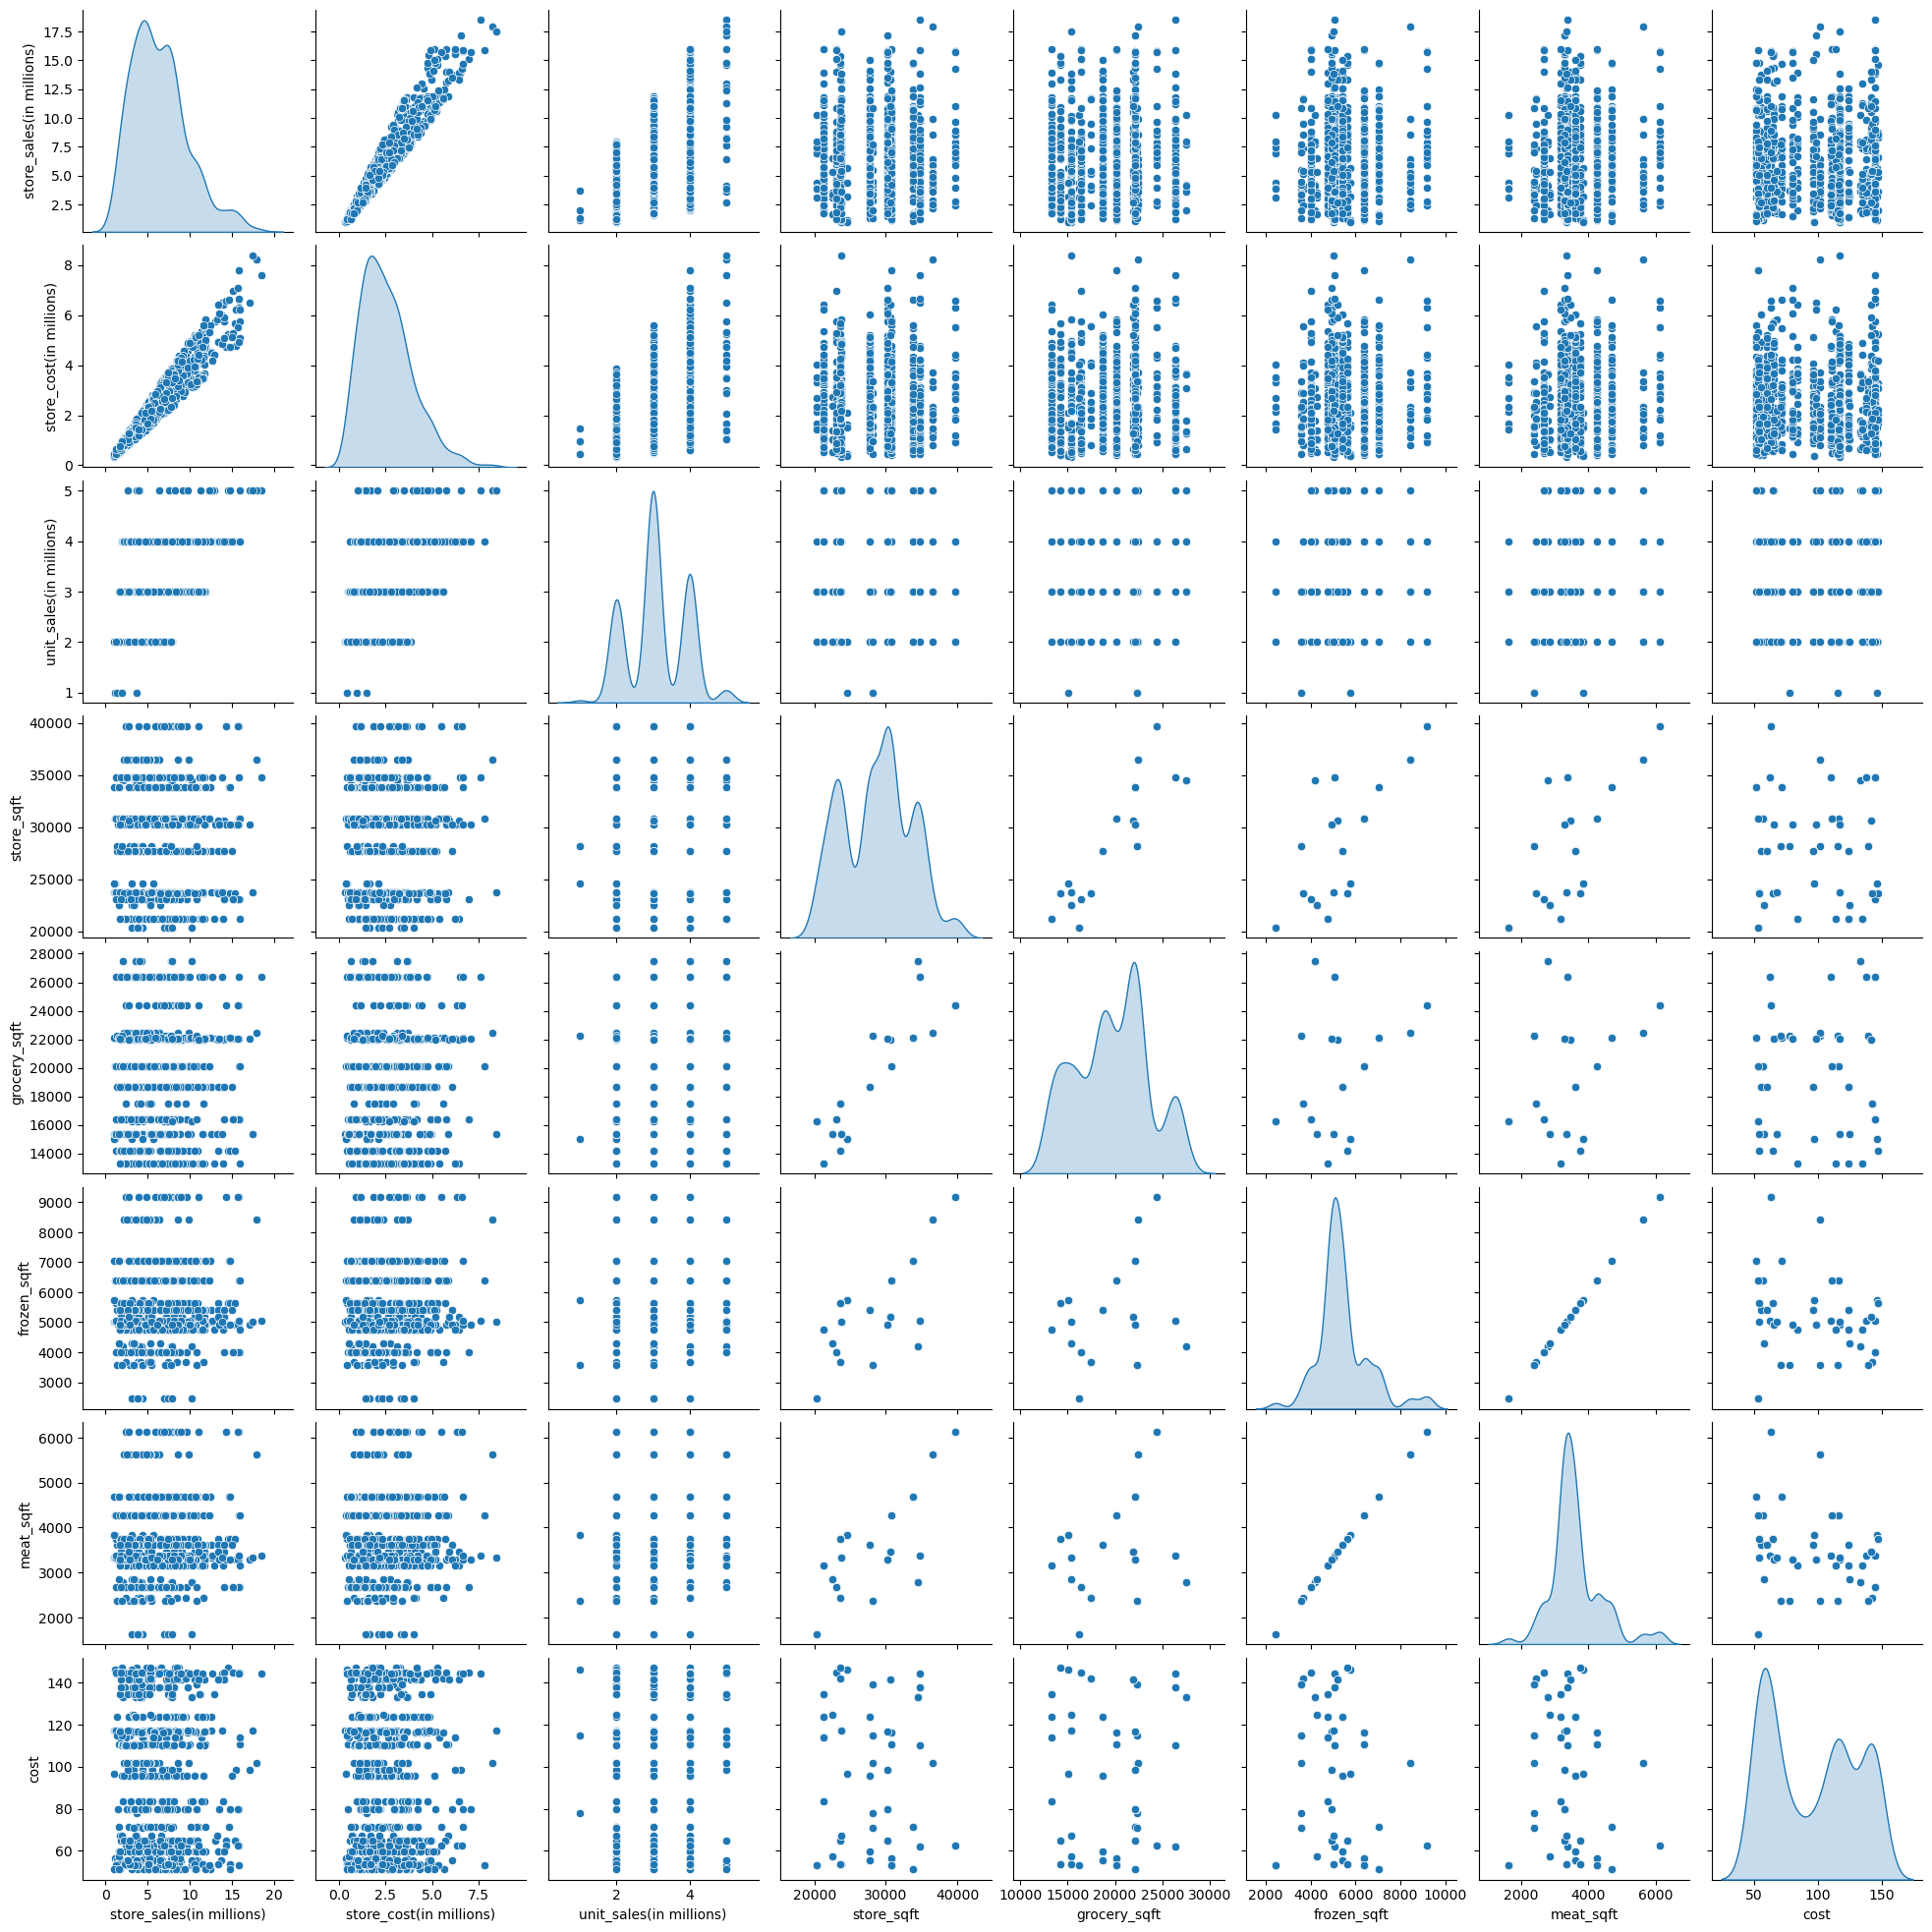

In [7]:
sns.pairplot(data,diag_kind='kde')

### outlier removal

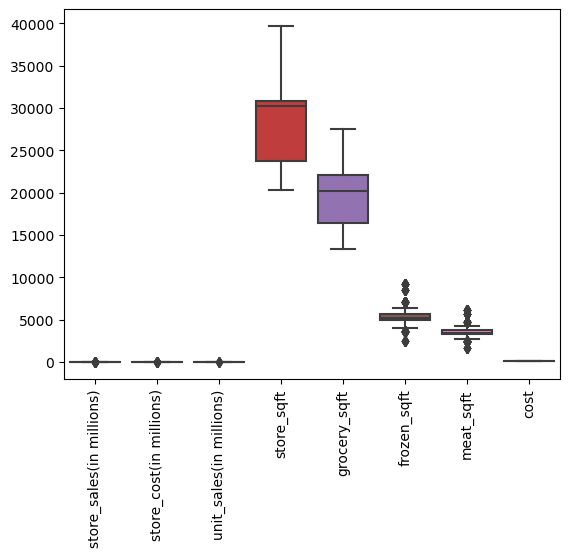

In [8]:
dataNumeric = data.select_dtypes(exclude='object')
sns.boxplot(data=data)
plt.xticks(rotation=90) 
plt.show()

In [9]:
#frozen_sqft
q1=np.percentile(data['frozen_sqft'], 25)
q3=np.percentile(data['frozen_sqft'], 75)
iqr=q3-q1
up=q3+iqr*1.5
low=q1-iqr*1.5
print(up)
print(low)

6698.0
3858.0


In [10]:
#meat_sqrt
q1=np.percentile(data['meat_sqft'], 25)
q3=np.percentile(data['meat_sqft'], 75)
iqr=q3-q1
up=q3+iqr*1.5
low=q1-iqr*1.5
print(up)
print(low)

4464.5
2572.5


In [11]:
#store_sales(in millions)
q1=np.percentile(data['store_sales(in millions)'], 25)
q3=np.percentile(data['store_sales(in millions)'], 75)
iqr=q3-q1
up=q3+iqr*1.5
low=q1-iqr*1.5
print(up)
print(low)

14.61
-2.4899999999999993


In [12]:
#store_cost(in millions)
q1=np.percentile(data['store_cost(in millions)'], 25)
q3=np.percentile(data['store_cost(in millions)'], 75)
iqr=q3-q1
up=q3+iqr*1.5
low=q1-iqr*1.5
print(up)
print(low)

6.062925
-1.1892749999999999


In [13]:
#unit_sales(in millions)
q1=np.percentile(data['unit_sales(in millions)'], 25)
q3=np.percentile(data['unit_sales(in millions)'], 75)
iqr=q3-q1
up=q3+iqr*1.5
low=q1-iqr*1.5
print(up)
print(low)

5.5
1.5


In [14]:
data=data[(data['frozen_sqft']<6698)&
          (data['frozen_sqft']>3858)&
          (data['meat_sqft']<4464.5)&
          (data['meat_sqft']>2572.5)&
          (data['store_sales(in millions)']<14.61)&
          (data['store_sales(in millions)']>-2.489)&
         (data['store_cost(in millions)']<6.2185)&
          (data['store_cost(in millions)']>-1.189)&
         (data['unit_sales(in millions)']<5.5)&
         (data['unit_sales(in millions)']>1.5)]
data

food_category  store_sales(in millions)  store_cost(in millions)  \
8073  Breakfast Foods                      7.08                   2.7612   
66              Bread                      2.52                   1.0080   
4685   Paper Products                      3.18                   1.0176   
8106        Specialty                      3.96                   1.6632   
7747   Canned Oysters                      6.36                   1.9716   
...               ...                       ...                      ...   
5726  Breakfast Foods                      3.93                   1.4148   
1173      Snack Foods                      5.04                   1.6632   
2484      Snack Foods                      8.25                   3.4650   
5908       Vegetables                     11.04                   5.1888   
1243      Snack Foods                      7.88                   2.6792   

      unit_sales(in millions)         promotion_name sales_country  \
8073                        3              Big Promo           USA   
66                          2             Sales Days           USA   
4685                        2           Super Savers        Mexico   
8106                        4             Sales Days        Mexico   
7747                        3  Cash Register Lottery           USA   
...                       ...                    ...           ...   
5726                        3           Super Savers           USA   
1173                        3  Cash Register Lottery           USA   
2484                        5           Best Savings           USA   
5908                        3      Pick Your Savings        Mexico   
1243                        4              Big Promo           USA   

     marital_status gender            education member_card  ...  \
8073              M      M   High School Degree      Silver  ...   
66                M      M  Partial High School      Bronze  ...   
4685              S      M      Partial College      Bronze  ...   
8106              M      F  Partial High School      Normal  ...   
7747              S      F  Partial High School      Bronze  ...   
...             ...    ...                  ...         ...  ...   
5726              M      M      Graduate Degree      Golden  ...   
1173              S      F   High School Degree      Bronze  ...   
2484              M      M   High School Degree      Bronze  ...   
5908              S      F     Bachelors Degree      Normal  ...   
1243              S      F   High School Degree      Bronze  ...   

     avg yearly_income           store_type     store_city store_state  \
8073       $30K - $50K  Gourmet Supermarket  Beverly Hills          CA   
66         $10K - $30K          Supermarket        Spokane          WA   
4685       $50K - $70K          Supermarket        Orizaba    Veracruz   
8106       $10K - $30K   Deluxe Supermarket         Merida     Yucatan   
7747       $70K - $90K   Deluxe Supermarket          Salem          OR   
...                ...                  ...            ...         ...   
5726     $130K - $150K          Supermarket        Seattle          WA   
1173       $30K - $50K   Deluxe Supermarket          Salem          OR   
2484       $50K - $70K          Supermarket        Seattle          WA   
5908       $10K - $30K   Deluxe Supermarket        Hidalgo   Zacatecas   
1243       $30K - $50K          Supermarket        Spokane          WA   

     store_sqft  grocery_sqft  frozen_sqft  meat_sqft  \
8073      23688         15337         5011       3340   
66        30268         22063         4923       3282   
4685      34791         26354         5062       3375   
8106      30797         20141         6393       4262   
7747      27694         18670         5415       3610   
...         ...           ...          ...        ...   
5726      21215         13305         4746       3164   
1173      27694         18670         5415       3610   
2484      21215         13305      

### dataset balance

Text(0.5, 1.0, 'Bar Chart of promotion name\xa0Variable')

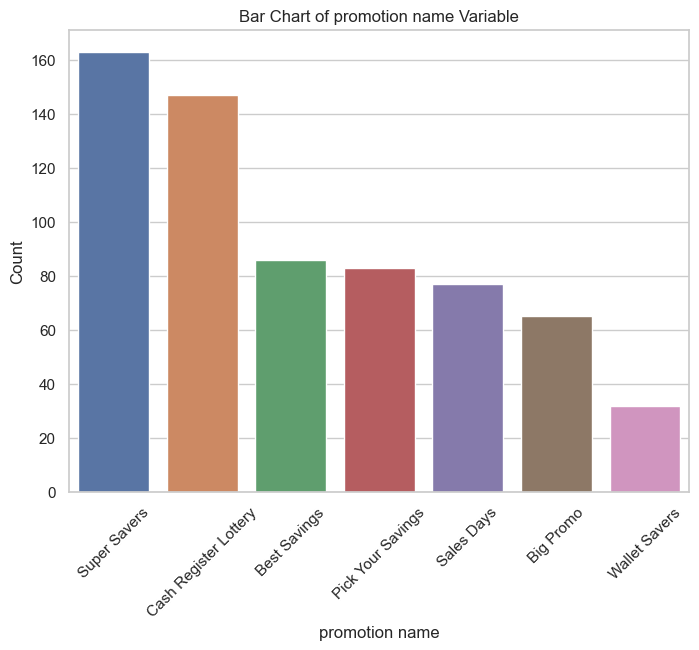

In [15]:
#checking dataset that balance or imbalance
data1= data['promotion_name'].value_counts().reset_index()
data1.columns = ['promotion_name', 'count']

# Create a bar plot using Seaborn
sns.set(style="whitegrid")
plt.figure(figsize=(8, 6))
plt.xticks(rotation=45)

# Create the bar chart
sns.barplot(x="promotion_name", y="count", data=data1)

# Adding labels and title
plt.xlabel("promotion name")
plt.ylabel("Count")
plt.title("Bar Chart of promotion name Variable")

### distribution

In [16]:
data['promotion_name']

8073                Big Promo
66                 Sales Days
4685             Super Savers
8106               Sales Days
7747    Cash Register Lottery
                ...          
5726             Super Savers
1173    Cash Register Lottery
2484             Best Savings
5908        Pick Your Savings
1243                Big Promo
Name: promotion_name, Length: 653, dtype: object

In [17]:
#label endcoding
promotion_name=['Cash Register Lottery','Super Savers','Best Savings',
                'Pick Your Savings','Big Promo',
                'Sales Days','Wallet Savers']
Values=[1,2,3,4,5,6,7]
data['promotion_name'].replace(promotion_name,Values,inplace=True)
data['promotion_name']

8073    5
66      6
4685    2
8106    6
7747    1
       ..
5726    2
1173    1
2484    3
5908    4
1243    5
Name: promotion_name, Length: 653, dtype: int64

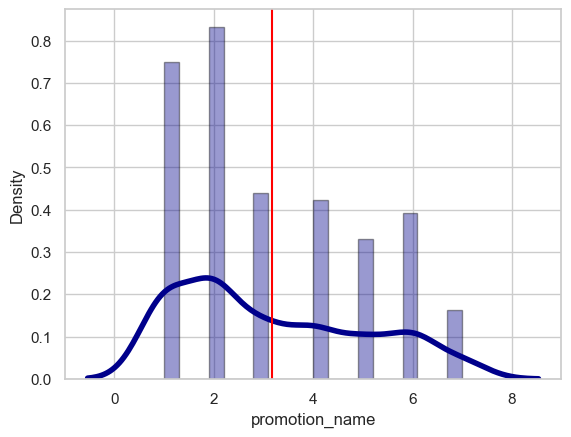

In [18]:
sns.distplot(data['promotion_name'], hist=True, kde=True, 
             bins=20, color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth':4})
mean=data['promotion_name'].mean()
plt.axvline(mean,0,1,color='red')

In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 653 entries, 8073 to 1243
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   food_category             653 non-null    object 
 1   store_sales(in millions)  653 non-null    float64
 2   store_cost(in millions)   653 non-null    float64
 3   unit_sales(in millions)   653 non-null    int64  
 4   promotion_name            653 non-null    int64  
 5   sales_country             653 non-null    object 
 6   marital_status            653 non-null    object 
 7   gender                    653 non-null    object 
 8   education                 653 non-null    object 
 9   member_card               653 non-null    object 
 10  occupation                653 non-null    object 
 11  avg yearly_income         653 non-null    object 
 12  store_type                653 non-null    object 
 13  store_city                653 non-null    object 
 14  store_state

In [20]:
print(data.columns)

Index(['food_category', 'store_sales(in millions)', 'store_cost(in millions)',
       'unit_sales(in millions)', 'promotion_name', 'sales_country',
       'marital_status', 'gender', 'education', 'member_card', 'occupation',
       'avg yearly_income', 'store_type', 'store_city', 'store_state',
       'store_sqft', 'grocery_sqft', 'frozen_sqft', 'meat_sqft', 'media_type',
       'cost'],
      dtype='object')


### dummy assigning

In [21]:
Dummy_column=['food_category','sales_country','marital_status','gender','education',
              'member_card','occupation','avg yearly_income','store_type','store_city',
              'store_state','media_type']

In [22]:
data=pd.get_dummies(data,columns =Dummy_column,dtype=int)
data

store_sales(in millions)  store_cost(in millions)  \
8073                      7.08                   2.7612   
66                        2.52                   1.0080   
4685                      3.18                   1.0176   
8106                      3.96                   1.6632   
7747                      6.36                   1.9716   
...                        ...                      ...   
5726                      3.93                   1.4148   
1173                      5.04                   1.6632   
2484                      8.25                   3.4650   
5908                     11.04                   5.1888   
1243                      7.88                   2.6792   

      unit_sales(in millions)  promotion_name  store_sqft  grocery_sqft  \
8073                        3               5       23688         15337   
66                          2               6       30268         22063   
4685                        2               2       34791         26354   
8106                        4               6       30797         20141   
7747                        3               1       27694         18670   
...                       ...             ...         ...           ...   
5726                        3               2       21215         13305   
1173                        3               1       27694         18670   
2484                        5               3       21215         13305   
5908                        3               4       30584         21938   
1243                        4               5       30268         22063   

      frozen_sqft  meat_sqft    cost  food_category_Baking Goods  ...  \
8073         5011       3340  117.04                           0  ...   
66           4923       3282  116.74                           0  ...   
4685         5062       3375  144.31                           0  ...   
8106         6393       4262  116.40                           0  ...   
7747         5415       3610  123.61                           0  ...   
...           ...        ...     ...                         ...  ...   
5726         4746       3164  134.66                           0  ...   
1173         5415       3610   59.86                           0  ...   
2484         4746       3164  114.01                           0  ...   
5908         5188       3458  141.38                           0  ...   
1243         4923       3282   98.52                           0  ...   

      media_type_Daily Paper  media_type_Daily Paper, Radio  \
8073                       0                              0   
66                         0                              0   
4685                       0                              0   
8106                       0                              0   
7747                       0                              0   
...                      ...                            ...   
5726                       0                              0   
1173                       0                              1   
2484                       0                              0   
5908                       0                              0   
1243                       0                              0   

      media_type_Daily Paper, Radio, TV  media_type_In-Store Coupon  \
8073                                  0                           0   
66                                    0                           0   
4685                                  0                           0   
8106                                  1                           0   
7747                                  0                           0   
...                                 ...                         ...   
5726                                  0                           1   
1173                                  0                           0   
2484                                  0                           0   
5908                                  0             

### defining x and y

In [23]:
x= data.drop('promotion_name',axis=1)
y= data['promotion_name']
x

store_sales(in millions)  store_cost(in millions)  \
8073                      7.08                   2.7612   
66                        2.52                   1.0080   
4685                      3.18                   1.0176   
8106                      3.96                   1.6632   
7747                      6.36                   1.9716   
...                        ...                      ...   
5726                      3.93                   1.4148   
1173                      5.04                   1.6632   
2484                      8.25                   3.4650   
5908                     11.04                   5.1888   
1243                      7.88                   2.6792   

      unit_sales(in millions)  store_sqft  grocery_sqft  frozen_sqft  \
8073                        3       23688         15337         5011   
66                          2       30268         22063         4923   
4685                        2       34791         26354         5062   
8106                        4       30797         20141         6393   
7747                        3       27694         18670         5415   
...                       ...         ...           ...          ...   
5726                        3       21215         13305         4746   
1173                        3       27694         18670         5415   
2484                        5       21215         13305         4746   
5908                        3       30584         21938         5188   
1243                        4       30268         22063         4923   

      meat_sqft    cost  food_category_Baking Goods  \
8073       3340  117.04                           0   
66         3282  116.74                           0   
4685       3375  144.31                           0   
8106       4262  116.40                           0   
7747       3610  123.61                           0   
...         ...     ...                         ...   
5726       3164  134.66                           0   
1173       3610   59.86                           0   
2484       3164  114.01                           0   
5908       3458  141.38                           0   
1243       3282   98.52                           0   

      food_category_Bathroom Products  ...  media_type_Daily Paper  \
8073                                0  ...                       0   
66                                  0  ...                       0   
4685                                0  ...                       0   
8106                                0  ...                       0   
7747                                0  ...                       0   
...                               ...  ...                     ...   
5726                                0  ...                       0   
1173                                0  ...                       0   
2484                                0  ...                       0   
5908                                0  ...                       0   
1243                                0  ...                       0   

      media_type_Daily Paper, Radio  media_type_Daily Paper, Radio, TV  \
8073                              0                                  0   
66                                0                                  0   
4685                              0                                  0   
8106                              0                                  1   
7747                              0                                  0   
...                             ...                                ...   
5726                              0                                  0   
1173                              1                                  0   
2484                              0                                  0   
5908                              0                                  0   
1243                              0                                  0   

      media_type_In-Store Coupon  media_t

In [24]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 653 entries, 8073 to 1243
Columns: 119 entries, store_sales(in millions) to media_type_TV
dtypes: float64(3), int32(110), int64(6)
memory usage: 331.6 KB


### Treating Imbalance(SMOTE over sampling)

In [25]:
y.value_counts()

promotion_name
2    163
1    147
3     86
4     83
6     77
5     65
7     32
Name: count, dtype: int64

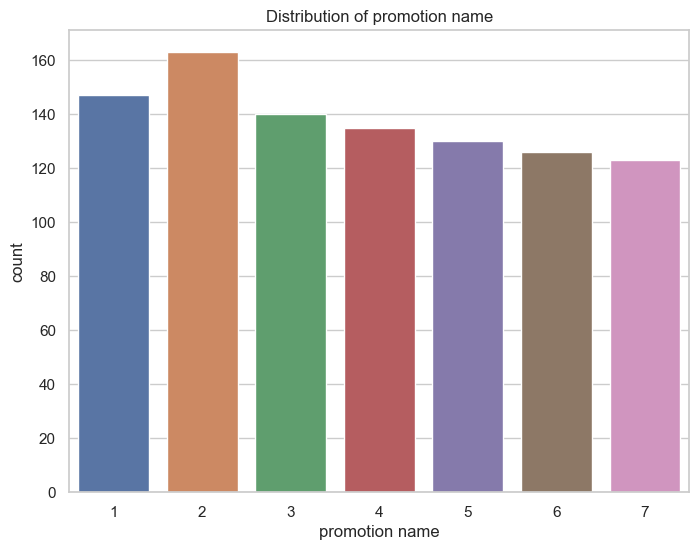

In [26]:
sample_strategy={4:135,3:140,5:130,6:126,7:123}
oversample=SMOTE(sampling_strategy=sample_strategy,k_neighbors=2,random_state=10)
x,y=oversample.fit_resample(x,y)
plt.figure(figsize=(8,6))
sns.countplot(x=y,order=sorted(data['promotion_name'].unique()))
plt.xlabel('promotion name')
plt.ylabel('count')
plt.title('Distribution of promotion name')
plt.show()

## Before Dimensionality reduction

### Spliting and Scaler fitting

In [27]:
xtrain, xtest, ytrain, ytest = train_test_split(x,y,train_size=0.8,random_state=10)

In [28]:
scaler= MinMaxScaler()
xtrain = scaler.fit_transform(xtrain)
xtest = scaler.transform(xtest)

### Logistic Regression

#### Hyperparameter Tuning

In [29]:
%%time
parameter1={
    'C':[20,30,40],
    'fit_intercept':[True,False],
    'class_weight':[None,'balanced'],
    'solver':['lbfgs','sag','saga'],
    'max_iter':[1,50,100],
    'penalty':['l1','l2'],
    'l1_ratio': [0.25, 0.5, 0.75,1.0]}

grid_search = GridSearchCV(LogisticRegression(),parameter1,cv=5, scoring='accuracy')
grid_search.fit(xtrain,ytrain)
best_model = grid_search.best_estimator_
best_params = grid_search.best_params_
print(best_params)
test_accuracy =best_model.score(xtest, ytest)
print("Test accuracy:", test_accuracy)

{'C': 20, 'class_weight': None, 'fit_intercept': True, 'l1_ratio': 0.5, 'max_iter': 100, 'penalty': 'l1', 'solver': 'saga'}
Test accuracy: 0.9689119170984456
CPU times: total: 22min 5s
Wall time: 5min 44s


In [30]:
model=LogisticRegression(C= 20,class_weight=None,fit_intercept=False,l1_ratio=0.25,max_iter=100,penalty= 'l1',solver='saga')
model.fit(xtrain, ytrain)
prediction = model.predict(xtest)
prediction

array([6, 2, 2, 2, 4, 3, 7, 3, 1, 2, 2, 1, 2, 2, 2, 4, 6, 4, 5, 5, 3, 2,
       4, 1, 1, 1, 3, 6, 1, 3, 4, 7, 6, 6, 1, 1, 5, 2, 2, 1, 7, 5, 4, 2,
       3, 1, 4, 2, 7, 3, 1, 1, 1, 4, 3, 3, 3, 3, 3, 6, 4, 1, 4, 3, 4, 6,
       1, 4, 1, 3, 1, 1, 5, 5, 4, 6, 1, 6, 7, 2, 1, 3, 2, 4, 3, 6, 1, 3,
       7, 4, 7, 1, 7, 5, 5, 5, 2, 4, 1, 5, 7, 4, 2, 5, 4, 5, 4, 3, 2, 2,
       6, 4, 4, 3, 7, 5, 1, 1, 7, 1, 7, 5, 5, 2, 7, 3, 1, 6, 1, 2, 6, 3,
       3, 4, 7, 4, 6, 4, 2, 2, 2, 6, 6, 2, 2, 3, 4, 1, 5, 4, 7, 1, 6, 5,
       4, 1, 2, 6, 7, 6, 6, 5, 1, 3, 1, 7, 6, 1, 4, 6, 4, 5, 6, 5, 2, 2,
       5, 4, 4, 5, 5, 4, 1, 2, 4, 2, 7, 5, 4, 3, 7, 4, 1], dtype=int64)

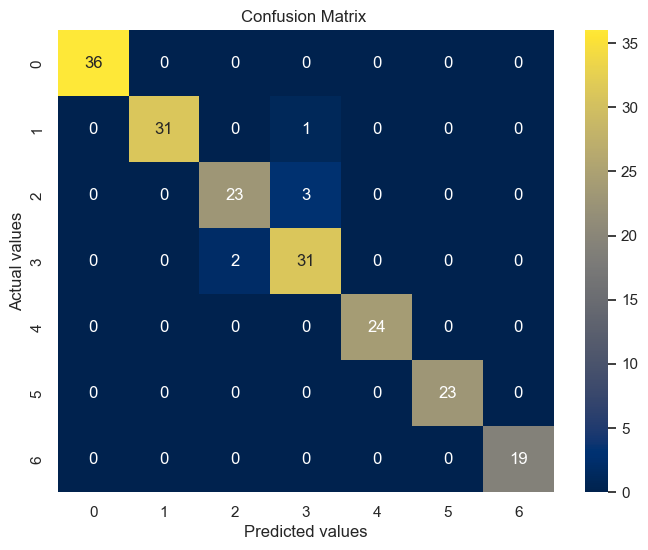

In [31]:
c_matrix= confusion_matrix(ytest, prediction)
plt.figure(figsize=(8, 6))
sns.heatmap(c_matrix, annot=True, fmt='d', cmap='cividis')
plt.xlabel('Predicted values')
plt.ylabel('Actual values')
plt.title('Confusion Matrix ')
plt.show()

In [32]:
print(classification_report(ytest,prediction))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        36
           2       1.00      0.97      0.98        32
           3       0.92      0.88      0.90        26
           4       0.89      0.94      0.91        33
           5       1.00      1.00      1.00        24
           6       1.00      1.00      1.00        23
           7       1.00      1.00      1.00        19

    accuracy                           0.97       193
   macro avg       0.97      0.97      0.97       193
weighted avg       0.97      0.97      0.97       193



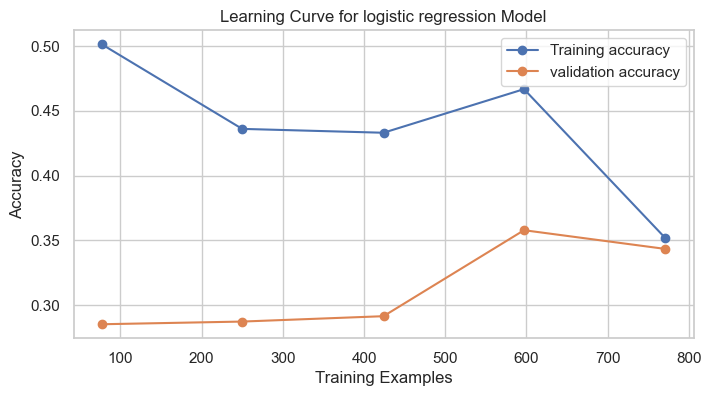

In [33]:
train_sizes, train_scores, test_scores = learning_curve(model,x,y,scoring='accuracy')
train_scores_mean=np.mean(train_scores,axis=1)
test_scores_mean=np.mean(test_scores,axis=1)

plt.figure(figsize=(8, 4))
plt.plot(train_sizes, train_scores_mean,'o-',label='Training accuracy')
plt.plot(train_sizes, test_scores_mean,'o-',label='validation accuracy')
    
plt.title('Learning Curve for logistic regression Model')
plt.xlabel('Training Examples')
plt.ylabel('Accuracy')
plt.legend(loc='best')
plt.grid(True)
plt.show()

In [34]:
best_parameters = {'C': 20, 'class_weight': None, 'fit_intercept': False, 
                   'l1_ratio': 0.25, 'max_iter': 100, 'penalty': 'l1', 'solver': 'saga'}

final_model = OneVsRestClassifier(LogisticRegression(**best_parameters))
final_model.fit(xtrain,ytrain)
final_ypred=final_model.predict(xtest)
prob=final_model.predict_proba(xtest)

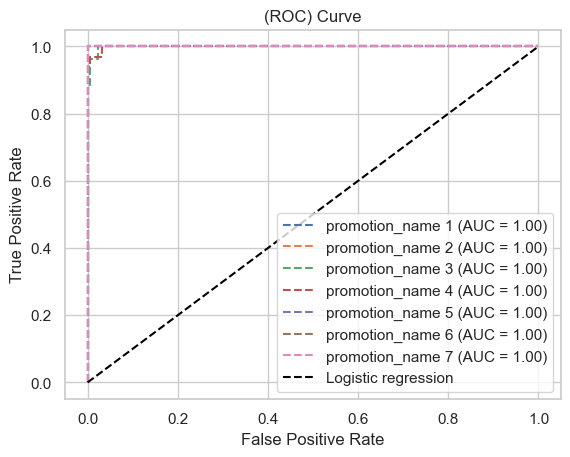

In [35]:
y_test_binarized = label_binarize(ytest, classes=np.unique(ytest))

fpr = {}
tpr = {}
thresh = {}
roc_auc = {}

n_class = y_test_binarized.shape[1]

# Plot ROC curve for each class
for i in range(n_class):
    fpr[i], tpr[i], thresh[i] = roc_curve(y_test_binarized[:, i], prob[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
    
    plt.plot(fpr[i], tpr[i], linestyle='--', label=f'promotion_name {np.unique(ytest)[i]} (AUC = {roc_auc[i]:.2f})')

# Plot the random guessing line
plt.plot([0, 1], [0, 1], linestyle='--', color='black', label='Logistic regression')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('(ROC) Curve')
plt.legend()
plt.show()

### Random Forest

#### Hyperparameter Tuning

In [36]:
%%time
parameter2={
    'n_estimators':[50,100,200],
    'criterion':['gini','entrophy'],
    'max_depth':[5,10,20],
    'min_samples_split':[1,2,5],
    'min_samples_leaf':[1,10,50],
    'bootstrap':[True,False],
    'class_weight':[None,'balanced'],
    'max_features':[5,10]}
grid_search = GridSearchCV(RandomForestClassifier(),parameter2,cv=5, scoring='accuracy')
grid_search.fit(xtrain,ytrain)
best_model = grid_search.best_estimator_
best_params = grid_search.best_params_
print(best_params)
test_accuracy =best_model.score(xtest, ytest)
print("Test accuracy:", test_accuracy)

{'bootstrap': True, 'class_weight': 'balanced', 'criterion': 'gini', 'max_depth': 20, 'max_features': 10, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}
Test accuracy: 0.9792746113989638
CPU times: total: 4min
Wall time: 4min 26s


In [37]:
clf =RandomForestClassifier(bootstrap=False,class_weight=None,criterion='gini',max_depth=20,
                            max_features=10,min_samples_leaf=1,min_samples_split=5,n_estimators=200)
clf.fit(xtrain, ytrain)
prediction2 = clf.predict(xtest)
prediction2

array([6, 2, 2, 2, 4, 3, 7, 3, 1, 2, 2, 1, 2, 2, 2, 4, 6, 4, 5, 5, 3, 2,
       4, 1, 1, 1, 3, 6, 1, 3, 4, 7, 6, 6, 1, 1, 5, 2, 2, 1, 7, 5, 3, 2,
       3, 1, 2, 2, 7, 3, 1, 1, 1, 4, 3, 3, 3, 3, 3, 6, 4, 1, 4, 3, 4, 6,
       1, 4, 1, 3, 1, 1, 5, 5, 4, 6, 1, 6, 7, 2, 1, 3, 2, 4, 3, 6, 1, 3,
       7, 4, 7, 1, 7, 5, 5, 5, 2, 4, 1, 5, 7, 4, 2, 5, 4, 5, 4, 3, 2, 2,
       6, 4, 4, 3, 7, 5, 1, 1, 7, 1, 7, 5, 5, 2, 7, 3, 1, 6, 1, 2, 6, 4,
       4, 4, 7, 4, 6, 4, 2, 2, 2, 6, 6, 2, 2, 3, 4, 1, 5, 4, 7, 1, 6, 5,
       4, 1, 2, 6, 7, 6, 6, 5, 1, 3, 1, 7, 6, 1, 4, 6, 4, 5, 6, 5, 2, 2,
       5, 4, 4, 5, 5, 4, 1, 2, 4, 2, 7, 5, 4, 3, 7, 4, 1], dtype=int64)

In [38]:
print(classification_report(ytest,prediction2))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        36
           2       1.00      1.00      1.00        32
           3       1.00      0.92      0.96        26
           4       0.94      1.00      0.97        33
           5       1.00      1.00      1.00        24
           6       1.00      1.00      1.00        23
           7       1.00      1.00      1.00        19

    accuracy                           0.99       193
   macro avg       0.99      0.99      0.99       193
weighted avg       0.99      0.99      0.99       193



### Support Vector Machine

#### Hyperparameter Tuning

In [39]:
%%time
parameter3= {
    'C': [0.1, 1, 10, 100],
    'kernel': ['linear', 'rbf','polynomial','sigmoid'],
    'gamma': [0.1, 1, 10, 100]}

grid_search = GridSearchCV(SVC(), parameter3, cv=5, scoring='accuracy')
grid_search.fit(xtrain, ytrain)
best_model = grid_search.best_estimator_
best_params = grid_search.best_params_
print(best_params)
test_accuracy =best_model.score(xtest, ytest)
print("Test accuracy:", test_accuracy)

{'C': 10, 'gamma': 0.1, 'kernel': 'linear'}
Test accuracy: 0.9740932642487047
CPU times: total: 8.39 s
Wall time: 9.39 s


In [40]:
svm = SVC(kernel="linear", gamma=0.1, C=10)
svm.fit(xtrain, ytrain)
prediction3 =svm.predict(xtest)
prediction3

array([6, 2, 2, 2, 4, 3, 7, 3, 1, 2, 2, 1, 2, 2, 2, 4, 6, 4, 5, 5, 3, 2,
       4, 1, 1, 1, 3, 6, 1, 3, 4, 7, 6, 6, 1, 1, 5, 2, 2, 1, 7, 5, 4, 2,
       3, 1, 2, 2, 7, 3, 1, 1, 1, 4, 3, 3, 3, 3, 3, 6, 4, 1, 4, 3, 4, 6,
       1, 4, 1, 3, 1, 1, 5, 5, 4, 6, 1, 6, 7, 2, 1, 3, 2, 4, 3, 6, 1, 3,
       7, 4, 7, 1, 7, 5, 5, 5, 2, 4, 1, 5, 7, 4, 2, 5, 4, 5, 4, 3, 2, 2,
       6, 4, 4, 3, 7, 5, 1, 1, 7, 1, 7, 5, 5, 2, 7, 3, 1, 6, 1, 2, 6, 3,
       2, 4, 7, 4, 6, 4, 2, 2, 2, 6, 6, 2, 2, 3, 4, 1, 5, 4, 7, 1, 6, 5,
       4, 1, 2, 6, 7, 6, 6, 5, 1, 3, 1, 7, 6, 1, 4, 6, 4, 5, 6, 5, 2, 2,
       5, 4, 4, 5, 5, 4, 1, 2, 4, 2, 7, 5, 4, 3, 7, 4, 1], dtype=int64)

In [41]:
print(classification_report(ytest,prediction3))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        36
           2       0.97      1.00      0.98        32
           3       0.96      0.88      0.92        26
           4       0.91      0.94      0.93        33
           5       1.00      1.00      1.00        24
           6       1.00      1.00      1.00        23
           7       1.00      1.00      1.00        19

    accuracy                           0.97       193
   macro avg       0.98      0.97      0.98       193
weighted avg       0.97      0.97      0.97       193



### K neighbors Classifier

#### Hyperparameter Tuning

In [42]:
%%time
parameter4={
    'n_neighbors':[1,2,3],
    'weights':['uniform','distance'],
    'algorithm':['ball-tree','kd-tree','brute'],
    'metric':['eucliean','manhattan','minkowski','hamming']}

grid_search = GridSearchCV(KNeighborsClassifier(), parameter4, cv=5, scoring='accuracy')
grid_search.fit(xtrain, ytrain)
best_model = grid_search.best_estimator_
best_params = grid_search.best_params_
print(best_params)
test_accuracy =best_model.score(xtest, ytest)
print("Test accuracy:", test_accuracy)

{'algorithm': 'brute', 'metric': 'hamming', 'n_neighbors': 2, 'weights': 'distance'}
Test accuracy: 0.9533678756476683
CPU times: total: 7.88 s
Wall time: 4.04 s


In [43]:
knn = KNeighborsClassifier(n_neighbors=2,weights='distance',algorithm= 'brute', metric='hamming')
model=knn.fit(xtrain, ytrain)
model
prediction4= knn.predict(xtest)
prediction4

array([6, 2, 2, 2, 4, 3, 7, 3, 1, 2, 2, 1, 2, 2, 2, 4, 6, 4, 4, 5, 5, 2,
       4, 1, 1, 1, 3, 6, 1, 3, 4, 7, 6, 6, 1, 1, 5, 2, 2, 1, 7, 5, 3, 2,
       3, 1, 2, 2, 7, 3, 1, 1, 1, 4, 3, 3, 3, 3, 3, 6, 4, 1, 4, 3, 4, 6,
       1, 4, 1, 3, 1, 1, 5, 5, 4, 6, 1, 6, 7, 2, 1, 3, 2, 4, 3, 6, 1, 3,
       7, 4, 7, 1, 7, 5, 5, 5, 2, 4, 1, 5, 7, 4, 2, 5, 4, 5, 4, 3, 3, 2,
       6, 4, 4, 3, 2, 5, 1, 1, 7, 1, 7, 5, 5, 2, 7, 3, 1, 6, 1, 2, 6, 4,
       4, 4, 7, 3, 6, 4, 2, 2, 2, 6, 6, 2, 2, 2, 4, 1, 5, 4, 7, 1, 6, 5,
       4, 1, 2, 6, 7, 6, 6, 5, 1, 3, 1, 7, 6, 1, 4, 2, 4, 5, 6, 5, 2, 2,
       5, 4, 4, 5, 5, 4, 1, 2, 4, 2, 7, 5, 4, 3, 7, 4, 1], dtype=int64)

In [44]:
print(classification_report(ytest,prediction4))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        36
           2       0.91      0.97      0.94        32
           3       0.92      0.85      0.88        26
           4       0.91      0.97      0.94        33
           5       0.96      0.96      0.96        24
           6       1.00      0.96      0.98        23
           7       1.00      0.95      0.97        19

    accuracy                           0.95       193
   macro avg       0.96      0.95      0.95       193
weighted avg       0.95      0.95      0.95       193



## After Dimensionality reduction

In [45]:
x= data.drop('promotion_name',axis=1)
y= data['promotion_name']
x

store_sales(in millions)  store_cost(in millions)  \
8073                      7.08                   2.7612   
66                        2.52                   1.0080   
4685                      3.18                   1.0176   
8106                      3.96                   1.6632   
7747                      6.36                   1.9716   
...                        ...                      ...   
5726                      3.93                   1.4148   
1173                      5.04                   1.6632   
2484                      8.25                   3.4650   
5908                     11.04                   5.1888   
1243                      7.88                   2.6792   

      unit_sales(in millions)  store_sqft  grocery_sqft  frozen_sqft  \
8073                        3       23688         15337         5011   
66                          2       30268         22063         4923   
4685                        2       34791         26354         5062   
8106                        4       30797         20141         6393   
7747                        3       27694         18670         5415   
...                       ...         ...           ...          ...   
5726                        3       21215         13305         4746   
1173                        3       27694         18670         5415   
2484                        5       21215         13305         4746   
5908                        3       30584         21938         5188   
1243                        4       30268         22063         4923   

      meat_sqft    cost  food_category_Baking Goods  \
8073       3340  117.04                           0   
66         3282  116.74                           0   
4685       3375  144.31                           0   
8106       4262  116.40                           0   
7747       3610  123.61                           0   
...         ...     ...                         ...   
5726       3164  134.66                           0   
1173       3610   59.86                           0   
2484       3164  114.01                           0   
5908       3458  141.38                           0   
1243       3282   98.52                           0   

      food_category_Bathroom Products  ...  media_type_Daily Paper  \
8073                                0  ...                       0   
66                                  0  ...                       0   
4685                                0  ...                       0   
8106                                0  ...                       0   
7747                                0  ...                       0   
...                               ...  ...                     ...   
5726                                0  ...                       0   
1173                                0  ...                       0   
2484                                0  ...                       0   
5908                                0  ...                       0   
1243                                0  ...                       0   

      media_type_Daily Paper, Radio  media_type_Daily Paper, Radio, TV  \
8073                              0                                  0   
66                                0                                  0   
4685                              0                                  0   
8106                              0                                  1   
7747                              0                                  0   
...                             ...                                ...   
5726                              0                                  0   
1173                              1                                  0   
2484                              0                                  0   
5908                              0                                  0   
1243                              0                                  0   

      media_type_In-Store Coupon  media_t

In [46]:
#for this model random_state=15 and max_depth=10 is the optimal amount because under those values the decision tree classifier's 
# scores are defferentiating in a high level and there is no change when we exceeding those values.
dt = DecisionTreeClassifier(random_state=15, criterion  = 'entropy', max_depth = 10)
dt.fit(x,y)

DecisionTreeClassifier(criterion='entropy', max_depth=10, random_state=15)

In [47]:
for i, column in enumerate(data.drop('promotion_name', axis = 1)):
    fi= pd.DataFrame({'Variable': [column], 'Feature Importance Score': 
                       [dt.feature_importances_[i]]})
    try:
        final_fi = pd.concat([final_fi,fi], ignore_index = True)
    except:
        final_fi = fi
        
Final=final_fi.sort_values('Feature Importance Score',ascending=False).reset_index()
Final.head(50)

index                            Variable  Feature Importance Score
0       7                                cost                  0.413220
1      92                    store_city_Salem                  0.289713
2     115      media_type_Sunday Paper, Radio                  0.082095
3       6                           meat_sqft                  0.079209
4       3                          store_sqft                  0.061615
5       4                        grocery_sqft                  0.045627
6      90                   store_city_Merida                  0.015060
7     109       media_type_Daily Paper, Radio                  0.006986
8     100                 store_state_Jalisco                  0.006473
9      77       avg yearly_income_$30K - $50K                  0.000000
10     78       avg yearly_income_$50K - $70K                  0.000000
11     79       avg yearly_income_$70K - $90K                  0.000000
12     80      avg yearly_income_$90K - $110K                  0.000000
13     83         store_type_Mid-Size Grocery                  0.000000
14     81       store_type_Deluxe Supermarket                  0.000000
15     82      store_type_Gourmet Supermarket                  0.000000
16     75     avg yearly_income_$130K - $150K                  0.000000
17     84            store_type_Small Grocery                  0.000000
18     85              store_type_Supermarket                  0.000000
19     76           avg yearly_income_$150K +                  0.000000
20     72           occupation_Skilled Manual                  0.000000
21     74     avg yearly_income_$110K - $130K                  0.000000
22     73       avg yearly_income_$10K - $30K                  0.000000
23     87              store_city_Guadalajara                  0.000000
24     71             occupation_Professional                  0.000000
25     70                   occupation_Manual                  0.000000
26     69               occupation_Management                  0.000000
27     68                 occupation_Clerical                  0.000000
28     67                  member_card_Silver                  0.000000
29     66                  member_card_Normal                  0.000000
30     65                  member_card_Golden                  0.000000
31     64                  member_card_Bronze                  0.000000
32     63       education_Partial High School                  0.000000
33     86            store_city_Beverly Hills                  0.000000
34      0            store_sales(in millions)                  0.000000
35     88                  store_city_Hidalgo                  0.000000
36     89              store_city_Los Angeles                  0.000000
37    116  media_type_Sunday Paper, Radio, TV                  0.000000
38    114             media_type_Sunday Paper                  0.000000
39    113           media_type_Street Handout                  0.000000
40    112                    media_type_Radio                  0.000000
41    111          media_type_In-Store Coupon                  0.000000
42    110   media_type_Daily Paper, Radio, TV                  0.000000
43    108              media_type_Daily Paper                  0.000000
44    107    media_type_Cash Register Handout                  0.000000
45    106                media_type_Bulk Mail                  0.000000
46    105               store_state_Zacatecas                  0.000000
47    104                 store_state_Yucatan                  0.000000
48    103                      store_state_WA                  0.000000
49    102                store_state_Veracruz                  0.000000

In [48]:
feature_importances = dt.feature_importances_ >0
selected_features = x.columns[feature_importances]
x_selected = data[selected_features]
x=x_selected
x

store_sqft  grocery_sqft  meat_sqft    cost  store_city_Merida  \
8073       23688         15337       3340  117.04                  0   
66         30268         22063       3282  116.74                  0   
4685       34791         26354       3375  144.31                  0   
8106       30797         20141       4262  116.40                  1   
7747       27694         18670       3610  123.61                  0   
...          ...           ...        ...     ...                ...   
5726       21215         13305       3164  134.66                  0   
1173       27694         18670       3610   59.86                  0   
2484       21215         13305       3164  114.01                  0   
5908       30584         21938       3458  141.38                  0   
1243       30268         22063       3282   98.52                  0   

      store_city_Salem  store_state_Jalisco  media_type_Daily Paper, Radio  \
8073                 0                    0                              0   
66                   0                    0                              0   
4685                 0                    0                              0   
8106                 0                    0                              0   
7747                 1                    0                              0   
...                ...                  ...                            ...   
5726                 0                    0                              0   
1173                 1                    0                              1   
2484                 0                    0                              0   
5908                 0                    0                              0   
1243                 0                    0                              0   

      media_type_Sunday Paper, Radio  
8073                               0  
66                                 0  
4685                               0  
8106                               0  
7747                               1  
...                              ...  
5726                               0  
1173                               0  
2484                               0  
5908                               0  
1243                               0  

[653 rows x 9 columns]

### Treating Imbalance(SMOTE over sampling)

In [49]:
y.value_counts()

promotion_name
2    163
1    147
3     86
4     83
6     77
5     65
7     32
Name: count, dtype: int64

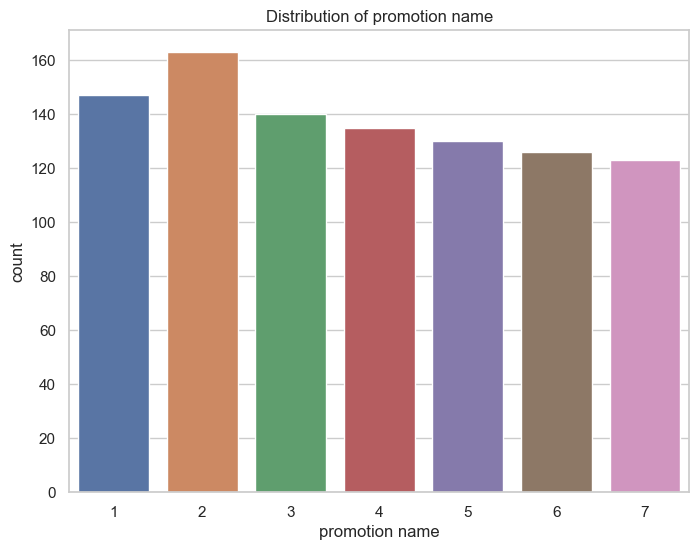

In [50]:
sample_strategy={4:135,3:140,5:130,6:126,7:123}
oversample=SMOTE(sampling_strategy=sample_strategy,k_neighbors=2,random_state=10)
x,y=oversample.fit_resample(x,y)
plt.figure(figsize=(8,6))
sns.countplot(x=y,order=sorted(data['promotion_name'].unique()))
plt.xlabel('promotion name')
plt.ylabel('count')
plt.title('Distribution of promotion name')
plt.show()

### Spliting and Scaler fitting

In [51]:
xtrain, xtest, ytrain, ytest = train_test_split(x,y,train_size=0.8,random_state=10)

In [52]:
scaler= MinMaxScaler()
xtrain = scaler.fit_transform(xtrain)
xtest = scaler.transform(xtest)

### Logistic Regression

#### Hyperparameter tuning

In [53]:
%%time
parameter1={
    'C':[20,30,40],
    'fit_intercept':[True,False],
    'class_weight':[None,'balanced'],
    'solver':['lbfgs','sag','saga'],
    'max_iter':[1,50,100],
    'penalty':['l1','l2'],
    'l1_ratio': [0.25, 0.5, 0.75,1.0]}

grid_search = GridSearchCV(LogisticRegression(),parameter1,cv=5, scoring='accuracy')
grid_search.fit(xtrain,ytrain)
best_model = grid_search.best_estimator_
best_params = grid_search.best_params_
print(best_params)
test_accuracy =best_model.score(xtest, ytest)
print("Test accuracy:", test_accuracy)

{'C': 40, 'class_weight': None, 'fit_intercept': False, 'l1_ratio': 0.25, 'max_iter': 100, 'penalty': 'l1', 'solver': 'saga'}
Test accuracy: 0.8031088082901554
CPU times: total: 3min 55s
Wall time: 53.8 s


In [54]:
model=LogisticRegression(C= 20,class_weight='balanced',fit_intercept=True,l1_ratio=0.25,max_iter=100,penalty= 'l1',solver='saga')
model.fit(xtrain, ytrain)
prediction = model.predict(xtest)
prediction

array([6, 2, 2, 2, 4, 6, 7, 3, 1, 2, 2, 1, 2, 2, 2, 4, 6, 4, 5, 4, 3, 2,
       4, 1, 1, 1, 6, 6, 1, 3, 4, 7, 6, 6, 1, 1, 5, 2, 2, 1, 7, 5, 3, 2,
       6, 1, 2, 2, 7, 3, 1, 1, 1, 3, 3, 3, 3, 5, 6, 6, 4, 1, 4, 3, 4, 6,
       1, 3, 1, 3, 1, 1, 5, 5, 4, 6, 1, 6, 7, 2, 1, 5, 2, 4, 3, 6, 1, 3,
       7, 3, 7, 1, 7, 3, 3, 4, 2, 3, 1, 4, 7, 4, 2, 4, 3, 4, 4, 3, 2, 2,
       6, 4, 3, 6, 7, 4, 1, 1, 7, 1, 7, 4, 3, 2, 7, 3, 1, 6, 1, 2, 6, 3,
       7, 4, 7, 3, 6, 4, 2, 2, 2, 6, 6, 2, 2, 3, 4, 1, 5, 3, 7, 1, 6, 4,
       7, 1, 2, 6, 7, 6, 6, 5, 1, 3, 1, 7, 6, 1, 4, 6, 3, 3, 6, 4, 2, 2,
       4, 4, 4, 4, 5, 4, 1, 2, 4, 2, 7, 5, 4, 3, 7, 4, 1], dtype=int64)

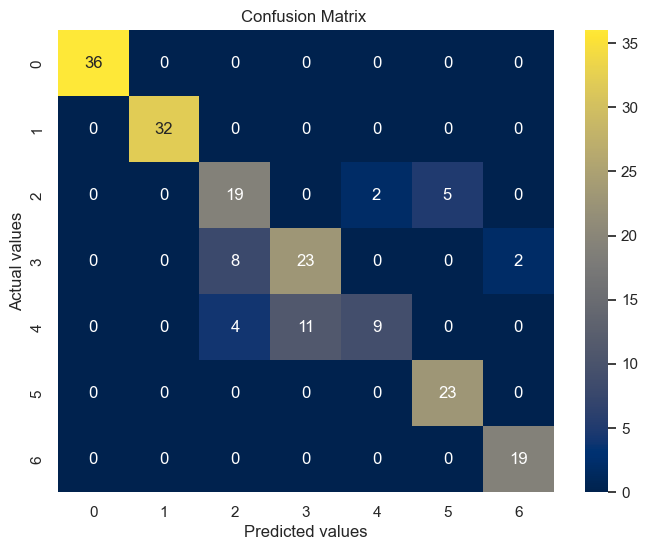

In [55]:
c_matrix= confusion_matrix(ytest, prediction)
plt.figure(figsize=(8, 6))
sns.heatmap(c_matrix, annot=True, fmt='d', cmap='cividis')
plt.xlabel('Predicted values')
plt.ylabel('Actual values')
plt.title('Confusion Matrix ')
plt.show()

In [56]:
print(classification_report(ytest,prediction))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        36
           2       1.00      1.00      1.00        32
           3       0.61      0.73      0.67        26
           4       0.68      0.70      0.69        33
           5       0.82      0.38      0.51        24
           6       0.82      1.00      0.90        23
           7       0.90      1.00      0.95        19

    accuracy                           0.83       193
   macro avg       0.83      0.83      0.82       193
weighted avg       0.84      0.83      0.82       193



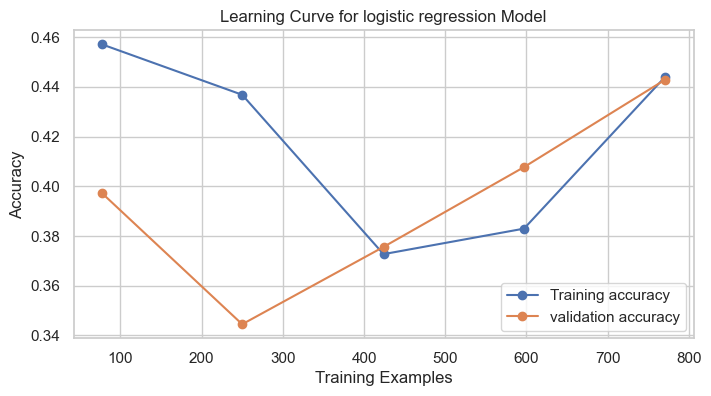

In [57]:
train_sizes, train_scores, test_scores = learning_curve(model,x,y,scoring='accuracy')
train_scores_mean=np.mean(train_scores,axis=1)
test_scores_mean=np.mean(test_scores,axis=1)

plt.figure(figsize=(8, 4))
plt.plot(train_sizes, train_scores_mean,'o-',label='Training accuracy')
plt.plot(train_sizes, test_scores_mean,'o-',label='validation accuracy')
    
plt.title('Learning Curve for logistic regression Model')
plt.xlabel('Training Examples')
plt.ylabel('Accuracy')
plt.legend(loc='best')
plt.grid(True)
plt.show()

In [58]:
best_parameters = {'C': 20, 'class_weight': 'balanced', 'fit_intercept': True, 
                   'l1_ratio': 0.25, 'max_iter': 100, 'penalty': 'l1', 'solver': 'saga'}

final_model = OneVsRestClassifier(LogisticRegression(**best_parameters))
final_model.fit(xtrain,ytrain)
final_ypred=final_model.predict(xtest)
prob=final_model.predict_proba(xtest)

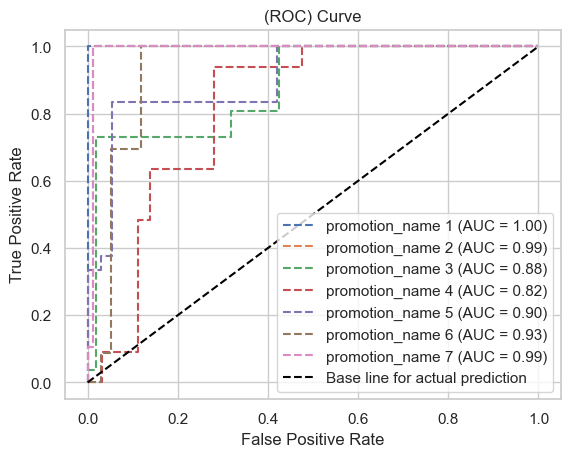

In [59]:
y_test_binarized = label_binarize(ytest, classes=np.unique(ytest))

fpr = {}
tpr = {}
thresh = {}
roc_auc = {}

n_class = y_test_binarized.shape[1]

# Plot ROC curve for each class
for i in range(n_class):
    fpr[i], tpr[i], thresh[i] = roc_curve(y_test_binarized[:, i], prob[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
    
    plt.plot(fpr[i], tpr[i], linestyle='--', label=f'promotion_name {np.unique(ytest)[i]} (AUC = {roc_auc[i]:.2f})')

# Plot the random guessing line
plt.plot([0, 1], [0, 1], linestyle='--', color='black', label='Base line for actual prediction')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('(ROC) Curve')
plt.legend()
plt.show()

### Random Forest Classifier

#### Hyperparameter tuning

In [60]:
%%time
parameter2={
    'n_estimators':[50,100,200],
    'criterion':['gini','entrophy'],
    'max_depth':[5,10,20],
    'min_samples_split':[1,2,5],
    'min_samples_leaf':[1,10,50],
    'bootstrap':[True,False],
    'class_weight':[None,'balanced'],
    'max_features':[5,10]}
grid_search = GridSearchCV(RandomForestClassifier(),parameter2,cv=5, scoring='accuracy')
grid_search.fit(xtrain,ytrain)
best_model = grid_search.best_estimator_
best_params = grid_search.best_params_
print(best_params)
test_accuracy =best_model.score(xtest, ytest)
print("Test accuracy:", test_accuracy)

{'bootstrap': True, 'class_weight': None, 'criterion': 'gini', 'max_depth': 10, 'max_features': 5, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}
Test accuracy: 1.0
CPU times: total: 4min 3s
Wall time: 4min 25s


In [61]:
clf =RandomForestClassifier(bootstrap=True,class_weight=None,
                            criterion='gini',max_depth= 10,
                            max_features=5,min_samples_leaf= 1,
                            min_samples_split=2,n_estimators=50)
clf.fit(xtrain, ytrain)
prediction2 = clf.predict(xtest)
prediction2

array([6, 2, 2, 2, 4, 3, 7, 3, 1, 2, 2, 1, 2, 2, 2, 4, 6, 4, 5, 5, 3, 2,
       4, 1, 1, 1, 3, 6, 1, 3, 4, 7, 6, 6, 1, 1, 5, 2, 2, 1, 7, 5, 3, 2,
       3, 1, 2, 2, 7, 3, 1, 1, 1, 4, 3, 3, 3, 3, 3, 6, 4, 1, 4, 3, 4, 6,
       1, 3, 1, 3, 1, 1, 5, 5, 4, 6, 1, 6, 7, 2, 1, 3, 2, 4, 3, 6, 1, 3,
       7, 4, 7, 1, 7, 5, 5, 5, 2, 4, 1, 5, 7, 4, 2, 5, 4, 5, 4, 3, 2, 2,
       6, 4, 4, 3, 7, 5, 1, 1, 7, 1, 7, 5, 5, 2, 7, 3, 1, 6, 1, 2, 6, 4,
       4, 4, 7, 4, 6, 4, 2, 2, 2, 6, 6, 2, 2, 3, 4, 1, 5, 4, 7, 1, 6, 5,
       4, 1, 2, 6, 7, 6, 6, 5, 1, 3, 1, 7, 6, 1, 4, 6, 3, 5, 6, 5, 2, 2,
       5, 4, 4, 5, 5, 4, 1, 2, 4, 2, 7, 5, 4, 3, 7, 4, 1], dtype=int64)

In [62]:
print(classification_report(ytest,prediction2))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        36
           2       1.00      1.00      1.00        32
           3       1.00      1.00      1.00        26
           4       1.00      1.00      1.00        33
           5       1.00      1.00      1.00        24
           6       1.00      1.00      1.00        23
           7       1.00      1.00      1.00        19

    accuracy                           1.00       193
   macro avg       1.00      1.00      1.00       193
weighted avg       1.00      1.00      1.00       193



### support vector machine

#### Hyperparameter tuning

In [63]:
%%time
parameter3= {
    'C': [0.1, 1, 10, 100],
    'kernel': ['linear', 'rbf','polynomial','sigmoid'],
    'gamma': [0.1, 1, 10, 100]}

grid_search = GridSearchCV(SVC(), parameter3, cv=5, scoring='accuracy')
grid_search.fit(xtrain, ytrain)
best_model = grid_search.best_estimator_
best_params = grid_search.best_params_
print(best_params)
test_accuracy =best_model.score(xtest, ytest)
print("Test accuracy:", test_accuracy)

{'C': 1, 'gamma': 100, 'kernel': 'rbf'}
Test accuracy: 1.0
CPU times: total: 2.48 s
Wall time: 2.95 s


In [64]:
svm = SVC(kernel="rbf", gamma=100, C=1)
svm.fit(xtrain, ytrain)
prediction3 =svm.predict(xtest)
prediction3

array([6, 2, 2, 2, 4, 3, 7, 3, 1, 2, 2, 1, 2, 2, 2, 4, 6, 4, 5, 5, 3, 2,
       4, 1, 1, 1, 3, 6, 1, 3, 4, 7, 6, 6, 1, 1, 5, 2, 2, 1, 7, 5, 3, 2,
       3, 1, 2, 2, 7, 3, 1, 1, 1, 4, 3, 3, 3, 3, 3, 6, 4, 1, 4, 3, 4, 6,
       1, 3, 1, 3, 1, 1, 5, 5, 4, 6, 1, 6, 7, 2, 1, 3, 2, 4, 3, 6, 1, 3,
       7, 4, 7, 1, 7, 5, 5, 5, 2, 4, 1, 5, 7, 4, 2, 5, 4, 5, 4, 3, 2, 2,
       6, 4, 4, 3, 7, 5, 1, 1, 7, 1, 7, 5, 5, 2, 7, 3, 1, 6, 1, 2, 6, 4,
       4, 4, 7, 4, 6, 4, 2, 2, 2, 6, 6, 2, 2, 3, 4, 1, 5, 4, 7, 1, 6, 5,
       4, 1, 2, 6, 7, 6, 6, 5, 1, 3, 1, 7, 6, 1, 4, 6, 3, 5, 6, 5, 2, 2,
       5, 4, 4, 5, 5, 4, 1, 2, 4, 2, 7, 5, 4, 3, 7, 4, 1], dtype=int64)

In [65]:
print(classification_report(ytest,prediction3))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        36
           2       1.00      1.00      1.00        32
           3       1.00      1.00      1.00        26
           4       1.00      1.00      1.00        33
           5       1.00      1.00      1.00        24
           6       1.00      1.00      1.00        23
           7       1.00      1.00      1.00        19

    accuracy                           1.00       193
   macro avg       1.00      1.00      1.00       193
weighted avg       1.00      1.00      1.00       193



### K neighbors Classifier

#### Hyperparameter tuning

In [66]:
%%time
parameter4={
    'n_neighbors':[1,2,3],
    'weights':['uniform','distance'],
    'algorithm':['ball-tree','kd-tree','brute'],
    'metric':['eucliean','manhattan','minkowski','hamming']}

grid_search = GridSearchCV(KNeighborsClassifier(), parameter4, cv=5, scoring='accuracy')
grid_search.fit(xtrain, ytrain)
best_model = grid_search.best_estimator_
best_params = grid_search.best_params_
print(best_params)
test_accuracy =best_model.score(xtest, ytest)
print("Test accuracy:", test_accuracy)

{'algorithm': 'brute', 'metric': 'manhattan', 'n_neighbors': 1, 'weights': 'uniform'}
Test accuracy: 1.0
CPU times: total: 10.7 s
Wall time: 3.27 s


In [67]:
knn = KNeighborsClassifier(n_neighbors=1,weights='uniform',algorithm= 'brute', metric='manhattan')
model=knn.fit(xtrain, ytrain)
model
prediction4= knn.predict(xtest)
prediction4

array([6, 2, 2, 2, 4, 3, 7, 3, 1, 2, 2, 1, 2, 2, 2, 4, 6, 4, 5, 5, 3, 2,
       4, 1, 1, 1, 3, 6, 1, 3, 4, 7, 6, 6, 1, 1, 5, 2, 2, 1, 7, 5, 3, 2,
       3, 1, 2, 2, 7, 3, 1, 1, 1, 4, 3, 3, 3, 3, 3, 6, 4, 1, 4, 3, 4, 6,
       1, 3, 1, 3, 1, 1, 5, 5, 4, 6, 1, 6, 7, 2, 1, 3, 2, 4, 3, 6, 1, 3,
       7, 4, 7, 1, 7, 5, 5, 5, 2, 4, 1, 5, 7, 4, 2, 5, 4, 5, 4, 3, 2, 2,
       6, 4, 4, 3, 7, 5, 1, 1, 7, 1, 7, 5, 5, 2, 7, 3, 1, 6, 1, 2, 6, 4,
       4, 4, 7, 4, 6, 4, 2, 2, 2, 6, 6, 2, 2, 3, 4, 1, 5, 4, 7, 1, 6, 5,
       4, 1, 2, 6, 7, 6, 6, 5, 1, 3, 1, 7, 6, 1, 4, 6, 3, 5, 6, 5, 2, 2,
       5, 4, 4, 5, 5, 4, 1, 2, 4, 2, 7, 5, 4, 3, 7, 4, 1], dtype=int64)

In [68]:
print(classification_report(ytest,prediction4))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        36
           2       1.00      1.00      1.00        32
           3       1.00      1.00      1.00        26
           4       1.00      1.00      1.00        33
           5       1.00      1.00      1.00        24
           6       1.00      1.00      1.00        23
           7       1.00      1.00      1.00        19

    accuracy                           1.00       193
   macro avg       1.00      1.00      1.00       193
weighted avg       1.00      1.00      1.00       193

